In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.18.0
Num GPUs Available: 1


In [ ]:
# ori_df = pd.read_parquet('/home/l.morales/.kiauhoku/grids/yrec/yrec_eep.pqt')
# ori_df['teff'] = 10 ** ori_df['Log Teff(K)']
# ori_df['age'] = ori_df['Age(Gyr)'] 
# ori_df = ori_df.reset_index()

# X = ori_df[['initial_mass','initial_met','logg']].copy()
# Y = ori_df[['age','teff']]

# X.columns = ['mass','met','logg']

In [26]:
# Load and unpack index (includes EEP, mass, metallicity)
ori_df = pd.read_parquet('/home/l.morales/.kiauhoku/grids/yrec/yrec_eep.pqt')
ori_df = ori_df.reset_index()  # Brings EEP and other index levels into columns

# Compute useful columns
ori_df['teff'] = 10 ** ori_df['Log Teff(K)']
ori_df['age'] = np.log10(ori_df['Age(Gyr)']) 

# üî™ Apply EEP cut to isolate RGB
# You can adjust this range depending on your tracks ‚Äî 500‚Äì800 is a typical RGB slice
rgb_df = ori_df[(ori_df['eep'] >= 450) & (ori_df['eep'] <= 951)]

# Now extract X and Y from the *filtered* DataFrame
X = rgb_df[['initial_mass', 'initial_met', 'logg']].copy()
Y = rgb_df[['age', 'teff']]

# Rename X columns for consistency
X.columns = ['mass', 'met', 'logg']

Scaling age and teff

In [27]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X.values)
Y_scaled = scaler_Y.fit_transform(Y.values)

X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=0)

Epoch 1/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - loss: 0.5107 - val_loss: 0.1287
Epoch 2/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.1245 - val_loss: 0.1132
Epoch 3/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.0992 - val_loss: 0.0992
Epoch 4/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.0866 - val_loss: 0.0889
Epoch 5/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.0776 - val_loss: 0.0800
Epoch 6/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.0724 - val_loss: 0.0740
Epoch 7/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.0682 - val_loss: 0.0692
Epoch 8/1000
334/334 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.

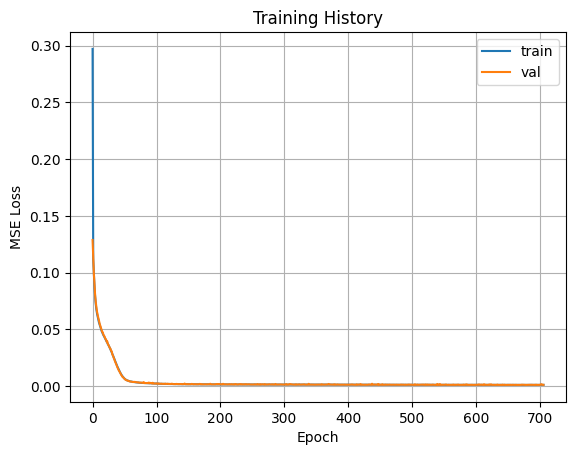

In [28]:
def build_ann():
    model = models.Sequential()
    model.add(layers.Input(shape=(3,)))  # mass, met, logg
    for _ in range(6):
        model.add(layers.Dense(128, activation='elu'))
    model.add(layers.Dense(2))  # Outputs: age, teff
    return model

model = build_ann()
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5), loss='mse')

#Optional: Save the best version
checkpoint_cb = ModelCheckpoint("best_ann_model.keras", save_best_only=True)

# Stop training if val_loss doesn't improve after 50 epochs
earlystop_cb = EarlyStopping(patience=50, restore_best_weights=True)

# Now train with the callbacks
history = model.fit(
    X_train, Y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_val, Y_val),
    callbacks=[checkpoint_cb, earlystop_cb]
)
# --- Plot training history ---
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

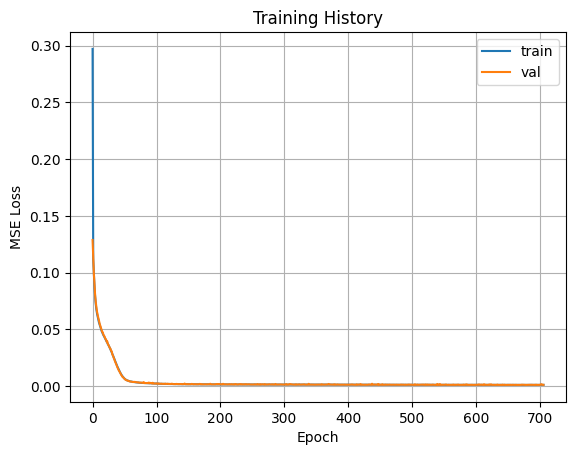

In [29]:
# --- Plot training history ---
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Grab final val loss
val_loss_std_units = history.history['val_loss'][-1]
val_rmse_std = np.sqrt(val_loss_std_units)

# Get std from scaler (for log(age) and Teff)
logage_std = np.sqrt(scaler_Y.var_[0])
teff_std = np.sqrt(scaler_Y.var_[1])

# Translate into physical units
logage_rmse = val_rmse_std * logage_std
teff_rmse = val_rmse_std * teff_std

print(f"RMSE in log(age): {logage_rmse:.4f} dex")
print(f"RMSE in Teff: {teff_rmse:.1f} K")

# Optional: convert log(age) RMSE to % age error
age_factor = 10 ** logage_rmse
print(f"Multiplicative age error factor: x{age_factor:.3f}")


RMSE in log(age): 0.0169 dex
RMSE in Teff: 29.5 K
Multiplicative age error factor: x1.040


In [31]:
# Evaluate loss in standardized units
val_loss = model.evaluate(X_val, Y_val, verbose=0)
print(f"Validation MSE (std units): {val_loss:.6f}")


Validation MSE (std units): 0.000933


By training an artificial neural network to emulate YREC stellar model grids, I found that the predictive precision asymptotically approached the resolution of the original grid itself. This revealed a fundamental, often unacknowledged uncertainty floor: even in the absence of observational noise, interpolated ages from these grids carry a theoretical uncertainty set by the spacing in mass, metallicity, and evolutionary phase.

In [40]:
colnames = ['KEPLER_ID','initial_mass', 'initial_met', 'eep', 'mass', 'teff', 'lum', 'met', 'logg', 'age','flag']
df_subset = pd.read_csv("/home/l.morales/ML_ages/seis_yrec.csv",header=None,names=colnames)  
X_test = df_subset[['mass', 'met', 'logg']].copy()
X_test_clean = X_test[df_subset['flag'] == 0].copy()

X_test_scaled = scaler_X.transform(X_test_clean)

/home/l.morales/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [42]:
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_Y.inverse_transform(predictions_scaled)

135/135 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 464us/step


In [45]:
df_clean = df_subset[df_subset['flag'] == 0].copy()
df_clean['log_age_pred'] = predictions[:, 0]
df_clean['teff_pred'] = predictions[:, 1]
df_clean['age_pred'] = 10 ** df_clean['log_age_pred']



In [49]:
df_clean['age_offset'] = df_clean['age_pred'] - df_clean['age']
df_clean['frac_offset'] = df_clean['age_offset'] / df_clean['age']

In [50]:
df_clean

KEPLER_ID  initial_mass  initial_met         eep      mass         teff  \
0      10000162      1.074200     0.103644  517.798619  1.074200  4749.006787   
1      10000198      1.110199    -0.117824  524.990749  1.110199  4834.909429   
2      10000207      1.053999    -0.082414  525.908625  1.053999  4753.679694   
3      10000547      1.139699    -0.211104  524.085150  1.139699  4928.971722   
4      10001326      1.217400    -0.069832  546.660714  1.217400  4648.976242   
...         ...           ...          ...         ...       ...          ...   
4334    9994845      1.286400     0.009462  558.858830  1.286400  4549.549675   
4335    9995133      1.028101    -0.127669  538.278461  1.028101  4656.150549   
4336    9995162      1.160600     0.081878  539.144497  1.160600  4607.907023   
4337    9996342      1.247300     0.193680  554.838966  1.247300  4459.247448   
4338    9996595      1.827600    -0.012859  544.502242  1.827600  5004.080385   

            lum       met      logg        age  flag  log_age_pred  \
0     12.317625  0.103644  3.048499   9.895512     0      0.994784   
1     14.735282 -0.117824  3.007999   7.666292     0      0.888140   
2     17.379800 -0.082414  2.883899   9.683272     0      0.981027   
3     12.603123 -0.211104  3.122099   6.597732     0      0.818645   
4     36.728661 -0.069832  2.581700   5.798055     0      0.760017   
...         ...       ...       ...        ...   ...           ...   
4334  52.180059  0.009462  2.415400   5.012776     0      0.696466   
4335  28.910963 -0.127669  2.614200  10.325821     0      1.008023   
4336  29.661065  0.081878  2.642300   7.481684     0      0.870284   
4337  52.000013  0.193680  2.374300   6.124041     0      0.785237   
4338  24.423303 -0.012859  3.065300   1.495476     0      0.173287   

        teff_pred   age_pred  age_offset  frac_offset  
0     4748.910645   9.880608   -0.014904    -0.001506  
1     4834.357910   7.729299    0.063007     0.008219  
2     4753.190430   9.572545   -0.110726    -0.011435  
3     4927.591309   6.586353   -0.011379    -0.001725  
4     4648.435059   5.754623   -0.043432    -0.007491  
...           ...        ...         ...          ...  
4334  4547.649902   4.971258   -0.041518    -0.008282  
4335  4648.970215  10.186448   -0.139373    -0.013498  
4336  4607.671387   7.417949   -0.063735    -0.008519  
4337  4455.460938   6.098702   -0.025339    -0.004138  
4338  4982.423828   1.490344   -0.005132    -0.003432  

[4291 rows x 16 columns]

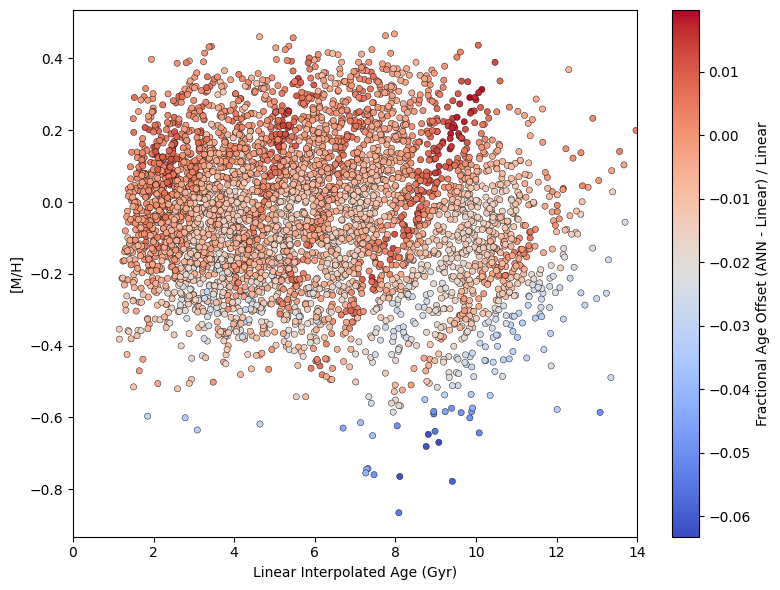

In [59]:
plt.figure(figsize=(8,6))
sc = plt.scatter(df_clean['age_pred'], df_clean['met'], 
                 c=df_clean['frac_offset'], cmap='coolwarm', s=20, edgecolor='k', linewidth=0.3)

plt.colorbar(sc, label='Fractional Age Offset (ANN - Linear) / Linear')
plt.xlabel('Linear Interpolated Age (Gyr)')
plt.ylabel('[M/H]')
plt.xlim(0,14)
plt.tight_layout()
plt.savefig('resultsANN.png')
plt.show()

In [57]:
mean_offset = df_clean['frac_offset'].mean()
std_offset = df_clean['frac_offset'].std()
print(f"Mean fractional offset: {mean_offset:.4f} ¬± {std_offset:.4f}")

Mean fractional offset: -0.0062 ¬± 0.0090
